In [1]:
# Your code here
!kaggle competitions download -c DontGetKicked

Traceback (most recent call last):
  File "/home/vscode/.local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/vscode/.local/lib/python3.10/site-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/home/vscode/.local/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/vscode/.kaggle. Or use the environment method.


In [2]:
# Open the zip file
import zipfile
zip_path = '/workspaces/Isabell-Joane-Eric-Final-Project/src/DontGetKicked.zip'
extract_to = '/workspaces/Isabell-Joane-Eric-Final-Project/data/processed'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_to)

In [3]:
import pandas as pd

total_data = pd.read_csv('/workspaces/Isabell-Joane-Eric-Final-Project/data/processed/training.csv')

total_data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
# Remove columns "AUCGUART" and "PRIMEUNIT"
columns_to_remove = ["AUCGUART", "PRIMEUNIT"]
total_data = total_data.drop(columns_to_remove, axis=1)

In [5]:
# Convert PurchDate to datetime
total_data['PurchDate'] = pd.to_datetime(total_data['PurchDate'])

In [6]:
# Convert WheelTypeID to 'category'
total_data['WheelTypeID'] = total_data['WheelTypeID'].astype('category')

In [7]:
# Grouping zip codes into larger regions
# grouping zip codes by thetotal_datairst two digits:
total_data['ZipRegion'] = total_data['VNZIP1'].astype(str).str[:2]

In [8]:
total_data = total_data.drop('VNST', axis=1)

In [9]:
total_data = total_data.drop('VNZIP1', axis=1)

In [10]:
total_data.drop('BYRNO', axis=1, inplace=True)

In [11]:
total_data.drop('PurchDate', axis=1, inplace=True)

In [12]:
total_data.drop('RefId', axis=1, inplace=True)

In [13]:
total_data.head()

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
0,0,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113,33
1,0,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053,33
2,0,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,33
3,0,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,33
4,0,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,33


In [14]:
print(total_data.columns)

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'ZipRegion'],
      dtype='object')


In [15]:
total_data = total_data.drop(columns=['SubModel', 'Color', 'WheelType'])

In [16]:
print(total_data.columns)

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'Transmission', 'WheelTypeID', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost', 'ZipRegion'],
      dtype='object')


In [17]:
total_data.head()

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,ZipRegion
0,0,ADESA,2006,3,MAZDA,MAZDA3,i,AUTO,1.0,89046,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113,33
1,0,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,AUTO,1.0,93593,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053,33
2,0,ADESA,2005,4,DODGE,STRATUS V6,SXT,AUTO,2.0,73807,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,33
3,0,ADESA,2004,5,DODGE,NEON,SXT,AUTO,1.0,65617,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,33
4,0,ADESA,2005,4,FORD,FOCUS,ZX3,MANUAL,2.0,69367,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,33


In [18]:
print(total_data.columns)

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'Transmission', 'WheelTypeID', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost', 'ZipRegion'],
      dtype='object')


Build Logistics Regression Model

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Ensure Uniform Data Types

In [20]:
# Ensure categorical columns are strings
categorical_columns = [
    'Auction', 'Transmission', 'WheelTypeID', 'Nationality', 'TopThreeAmericanName', 'IsOnlineSale', 'Size', 'ZipRegion'
]

for column in categorical_columns:
    total_data[column] = total_data[column].astype(str)

# Ensure numerical columns are floats
numerical_columns = [
    'VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
    'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost',
    'WarrantyCost'
]

for column in numerical_columns:
    total_data[column] = total_data[column].astype(float)


Define Preprocessing Steps

In [21]:
# Define feature sets for PCA
currentauction_features = [
    "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"
]
acquisitionauction_features = [
    "MMRAcquisitionAuctionAveragePrice", "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice"
]

# Define remaining features
remaining_features = [
    'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim', 'Transmission', 'WheelTypeID', 'VehOdo', 'Nationality', 
    'Size', 'TopThreeAmericanName', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'ZipRegion'
]

Define Transformers for Each Feature Type

In [22]:
# Define transformers for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('zero_replacer', SimpleImputer(strategy='constant', fill_value=np.nan)),  # Replace zeros with NaNs for imputation
    ('scaler', StandardScaler())  # Scale features
])

# Define transformers for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
])




Create the Pipeline
Combine Preprocessing Steps into a ColumnTransformer and Create a Pipeline

In [23]:
# Define PCA transformers for the two sets of features
pca_pipeline_current = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale features
    ('pca', PCA(n_components=3))  # Apply PCA
])

pca_pipeline_acquisition = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale features
    ('pca', PCA(n_components=3))  # Apply PCA
])

# Combine all preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('pca_current', pca_pipeline_current, currentauction_features),
        ('pca_acquisition', pca_pipeline_acquisition, acquisitionauction_features)
    ])

# Define the complete pipeline with PCA and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

Fit and Transform the Data

In [24]:
# Split the data
X = total_data[remaining_features + currentauction_features + acquisitionauction_features]
y = total_data['IsBadBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('zero_replacer',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['VehYear', 'VehicleAge',
                                                   'VehOdo',
                                                   'MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRe...
                                                   'MMRCurrentRetailAveragePrice',
                                                   'MMRCurrentRetailCleanPrice']),
                                                 ('pca_acquisition',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=3))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice'])])),
                ('classifier', LogisticRegression())])

In [26]:
# Transform the training and testing data
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)


In [27]:
# Fit the logistic regression model with increased max_iter
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_transformed, y_train)


LogisticRegression(max_iter=1000)

In [28]:
# Make predictions
y_pred = classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8953894635884085


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[12652   150]
 [ 1377   418]]


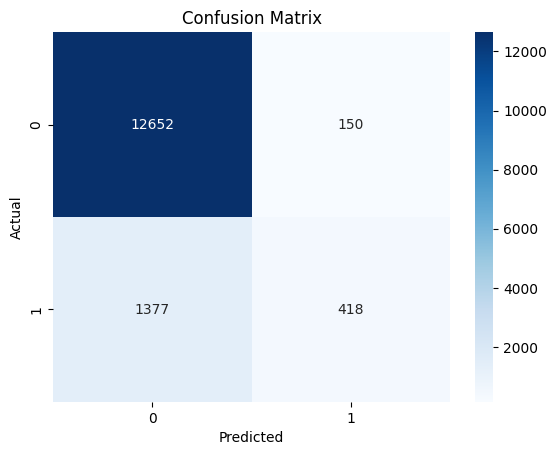

In [31]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12802
           1       0.74      0.23      0.35      1795

    accuracy                           0.90     14597
   macro avg       0.82      0.61      0.65     14597
weighted avg       0.88      0.90      0.87     14597



High Precision and Recall for Class 0: The model is very good at predicting non-bad buys.
Lower Precision and Recall for Class 1: The model struggles more with identifying bad buys, missing many of them (low recall).

In [56]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.7483319763320407


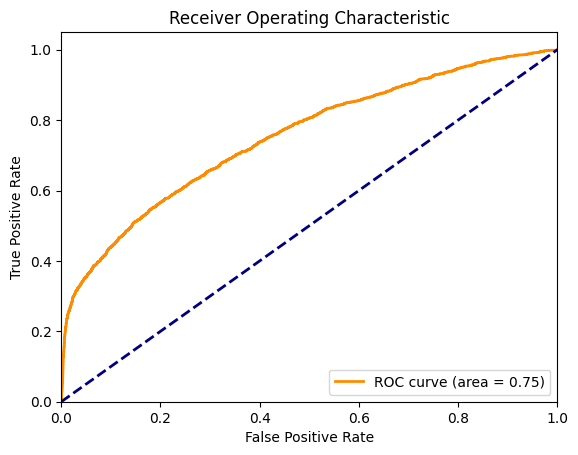

In [34]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC AUC score of 0.7516 indicates that the model has a reasonable ability to distinguish between the two classes. However, there is still room for improvement, particularly in enhancing the recall for the minority class (bad buys).

Hyperparameter Tuning for Logistic Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # 'liblinear' works with both 'l1' and 'l2' penalties
}


# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report and ROC AUC score
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')


Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best ROC AUC score: 0.7503438390596031
Accuracy: 0.8983352743714462
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     12850
           1       0.72      0.24      0.37      1747

    accuracy                           0.90     14597
   macro avg       0.81      0.62      0.66     14597
weighted avg       0.88      0.90      0.88     14597

ROC AUC: 0.6160754734631242


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

# Define the parameter grid without 'saga' solver
param_grid = {
    'classifier__C': loguniform(1e-4, 1e2),
    'classifier__solver': ['lbfgs', 'liblinear'],  # Exclude 'saga'
    'classifier__max_iter': [200, 300, 400, 500, 1000]
}

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=5))  
])

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=5, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Make predictions
y_pred = random_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, random_search.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc}')


Best Parameters: {'classifier__C': 0.017670169402947963, 'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}
Accuracy: 0.7455641570185655
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     12802
           1       0.26      0.60      0.37      1795

    accuracy                           0.75     14597
   macro avg       0.60      0.68      0.60     14597
weighted avg       0.85      0.75      0.78     14597

ROC AUC: 0.7527773123889503


Class Imbalance: The recall for class 1 (Bad Buys) has improved, but precision is quite low. This indicates that the model is able to identify more actual bad buys but at the cost of a high false positive rate.

Macro and Weighted Averages: The macro average metrics suggest the model performs differently across classes, which is common with imbalanced datasets. The weighted average metrics are skewed by the majority class.

Straightforward approach that applies SMOTE to handle class imbalance and then uses Logistic Regression for classification

In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from scipy.stats import loguniform

# Define the SMOTE oversampler
smote = SMOTE(random_state=42)

# Create a pipeline with SMOTE and LogisticRegression
pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Define the parameter grid
param_grid = {
    'classifier__C': loguniform(1e-4, 1e2),
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__max_iter': [200, 300, 400, 500, 1000]
}

# Perform RandomizedSearchCV with SMOTE
random_search_smote = RandomizedSearchCV(pipeline_smote, param_distributions=param_grid, n_iter=3, cv=5, random_state=42, n_jobs=-1)
random_search_smote.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters with SMOTE:", random_search_smote.best_params_)

# Make predictions
y_pred_smote = random_search_smote.predict(X_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy: {accuracy_smote}')

# Print classification report
class_report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report with SMOTE:")
print(class_report_smote)

# Calculate ROC AUC
roc_auc_smote = roc_auc_score(y_test, random_search_smote.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc_smote}')


Best Parameters with SMOTE: {'classifier__C': 0.017670169402947963, 'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}
Accuracy: 0.7505651846269782
Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     12802
           1       0.27      0.60      0.37      1795

    accuracy                           0.75     14597
   macro avg       0.60      0.69      0.61     14597
weighted avg       0.85      0.75      0.79     14597

ROC AUC: 0.7504388459498189


Improved Recall for Class 1: The recall for class 1 (Bad Buys) improved, indicating that the model is identifying more actual bad buys.
Trade-off: There is a trade-off between precision and recall for the minority class, but the recall improvement is notable.
ROC AUC: The ROC AUC score remains similar, indicating the model's overall discrimination ability is stable.

In [60]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_pred_prob = random_search_smote.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Find the threshold that maximizes the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the adjusted predictions
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f'Adjusted Accuracy: {accuracy_adjusted}')

# Print adjusted classification report
class_report_adjusted = classification_report(y_test, y_pred_adjusted)
print("Adjusted Classification Report:")
print(class_report_adjusted)

# Calculate adjusted ROC AUC
roc_auc_adjusted = roc_auc_score(y_test, y_pred_adjusted)
print(f'Adjusted ROC AUC: {roc_auc_adjusted}')


Adjusted Accuracy: 0.8651777762553949
Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12802
           1       0.44      0.37      0.41      1795

    accuracy                           0.87     14597
   macro avg       0.68      0.65      0.66     14597
weighted avg       0.86      0.87      0.86     14597

Adjusted ROC AUC: 0.6539444785568411


The results after adjusting the decision threshold show a significant improvement in the overall accuracy and an increase in precision for the minority class (Bad Buys). However, the recall for the minority class has decreased, and the ROC AUC has dropped slightly. This indicates that while the model is making fewer false positive predictions for the minority class, it is also missing more true positive predictions.

In [61]:
# Define the logistic regression model with manually adjusted class weights
manual_class_weights = {0: 1, 1: 3}  # Adjust these weights as needed
classifier_manual_weights = LogisticRegression(class_weight=manual_class_weights, max_iter=1000)

# Create a pipeline with SMOTE and logistic regression with manual class weights
pipeline_manual_weights = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', classifier_manual_weights)
])

# Perform RandomizedSearchCV with manually adjusted class weights
random_search_manual_weights = RandomizedSearchCV(pipeline_manual_weights, param_distributions=param_grid, n_iter=4, cv=5, random_state=42, n_jobs=-1)
random_search_manual_weights.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters with Manual Class Weights:", random_search_manual_weights.best_params_)

# Make predictions
y_pred_manual_weights = random_search_manual_weights.predict(X_test)

# Evaluate the model
accuracy_manual_weights = accuracy_score(y_test, y_pred_manual_weights)
print(f'Accuracy: {accuracy_manual_weights}')

# Print classification report
class_report_manual_weights = classification_report(y_test, y_pred_manual_weights)
print("Classification Report with Manual Class Weights:")
print(class_report_manual_weights)

# Calculate ROC AUC
roc_auc_manual_weights = roc_auc_score(y_test, random_search_manual_weights.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc_manual_weights}')


Best Parameters with Manual Class Weights: {'classifier__C': 2.465832945854912, 'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}
Accuracy: 0.3307528944303624
Classification Report with Manual Class Weights:
              precision    recall  f1-score   support

           0       0.96      0.25      0.39     12802
           1       0.15      0.93      0.25      1795

    accuracy                           0.33     14597
   macro avg       0.55      0.59      0.32     14597
weighted avg       0.86      0.33      0.38     14597

ROC AUC: 0.7472821316655345


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Create a pipeline with RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [10, 15, 20],  
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for RandomForestClassifier
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_grid_rf, n_iter=5, cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for RandomForest:", random_search_rf.best_params_)

# Make predictions
y_pred_rf = random_search_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

# Print classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for RandomForest:")
print(class_report_rf)

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test, random_search_rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc_rf}')



Best Parameters for RandomForest: {'classifier__n_estimators': 10, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Accuracy: 0.8994998972391587
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12850
           1       0.79      0.22      0.34      1747

    accuracy                           0.90     14597
   macro avg       0.85      0.61      0.64     14597
weighted avg       0.89      0.90      0.87     14597

ROC AUC: 0.6903640036616412


High Precision for Class 1: The precision for Class 1 (Bad Buys) is relatively high, meaning that when the model predicts a bad buy, it is correct 79% of the time.
Low Recall for Class 1: The recall for Class 1 is low (0.22), indicating that the model is missing many actual bad buys.
Overall Performance: The model performs well overall, with high accuracy and strong performance for the majority class.

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Create a pipeline with DecisionTreeClassifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for DecisionTreeClassifier
random_search_dt = RandomizedSearchCV(pipeline_dt, param_distributions=param_grid_dt, n_iter=5, cv=5, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for DecisionTree:", random_search_dt.best_params_)

# Make predictions
y_pred_dt = random_search_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')

# Print classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for DecisionTree:")
print(class_report_dt)

# Calculate ROC AUC
roc_auc_dt = roc_auc_score(y_test, random_search_dt.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc_dt}')


Best Parameters for DecisionTree: {'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 30}
Accuracy: 0.8044803726793177
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     12850
           1       0.28      0.40      0.33      1747

    accuracy                           0.80     14597
   macro avg       0.60      0.63      0.61     14597
weighted avg       0.84      0.80      0.82     14597

ROC AUC: 0.6340158671118249


Class 0 Performance: The model performs well for the majority class with high precision and recall.
Class 1 Performance: The precision and recall for Class 1 are lower, indicating room for improvement in identifying bad buys.
Overall Performance: The model achieves a balance between complexity and performance, with a reasonable ROC AUC.

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define the SMOTE oversampler
smote = SMOTE(random_state=42)

# Create a pipeline with SMOTE and DecisionTreeClassifier
pipeline_smote_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Define the parameter grid for DecisionTreeClassifier
param_grid_smote_dt = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for DecisionTreeClassifier with SMOTE
random_search_smote_dt = RandomizedSearchCV(pipeline_smote_dt, param_distributions=param_grid_smote_dt, n_iter=2, cv=5, random_state=42, n_jobs=-1)
random_search_smote_dt.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for DecisionTree with SMOTE:", random_search_smote_dt.best_params_)

# Make predictions
y_pred_smote_dt = random_search_smote_dt.predict(X_test)

# Evaluate the model
accuracy_smote_dt = accuracy_score(y_test, y_pred_smote_dt)
print(f'Accuracy: {accuracy_smote_dt}')

# Print classification report
class_report_smote_dt = classification_report(y_test, y_pred_smote_dt)
print("Classification Report for DecisionTree with SMOTE:")
print(class_report_smote_dt)

# Calculate ROC AUC
roc_auc_smote_dt = roc_auc_score(y_test, random_search_smote_dt.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc_smote_dt}')


Best Parameters for DecisionTree with SMOTE: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}
Accuracy: 0.8692197026786326
Classification Report for DecisionTree with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     12850
           1       0.44      0.36      0.39      1747

    accuracy                           0.87     14597
   macro avg       0.68      0.65      0.66     14597
weighted avg       0.86      0.87      0.86     14597

ROC AUC: 0.7163215428783973


Using SMOTE with a Decision Tree has provided a balanced improvement in performance for both classes. The model is now better at identifying the minority class while maintaining high accuracy and precision for the majority class.

Best parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 0.01}
Best Recall score: 0.5944855713407885
Accuracy: 0.7499486195793656
Precision: 0.26829877591806145
Recall: 0.5983286908077995
F1 Score: 0.37047257675060363
ROC AUC Score: 0.7511530014243073
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     12802
           1       0.27      0.60      0.37      1795

    accuracy                           0.75     14597
   macro avg       0.60      0.68      0.61     14597
weighted avg       0.85      0.75      0.79     14597



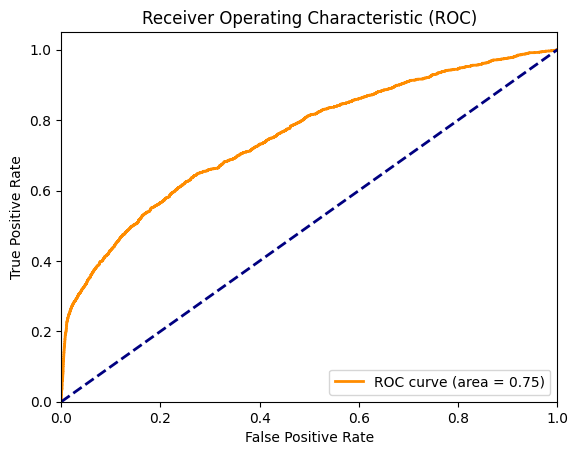

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


# Define the complete pipeline with SMOTE and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=2, cv=5, scoring='recall', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object on the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best Recall score: {random_search.best_score_}")

# Make predictions with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
